In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import math
from datetime import datetime
np.random.seed(0)

In [2]:
startDate='2019-12-31'
endDate='2020-11-18'
symbols = ['SWI', 'RNG','MSFT']
stockAmount = len(symbols)

In [3]:
df = pd.DataFrame({})
for i in symbols:
    tickerSymbol = i
    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)
    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=startDate, end=endDate)
    tickerDf["day_price"] = (tickerDf["Open"] + tickerDf["Close"]) /2
    tickerDf['previus_day_price'] = tickerDf["day_price"].shift()
    tickerDf['return'] = np.log( tickerDf["day_price"]/tickerDf['previus_day_price'] )
    #print(tickerSymbol, tickerDf)
    dfT = pd.DataFrame({
        tickerSymbol: tickerDf['return']
    })
    df = pd.concat([df, dfT], axis=1)
print(df.head())

                 SWI       RNG      MSFT
Date                                    
2019-12-31       NaN       NaN       NaN
2020-01-02  0.018231  0.024303  0.015556
2020-01-03 -0.013642 -0.005962 -0.007732
2020-01-06 -0.009743  0.017723 -0.002622
2020-01-07  0.001359  0.017612  0.002496


In [34]:
portafolio = np.random.rand(10001,stockAmount)
totals = portafolio.sum(axis=1)

In [36]:
for i in range(len(portafolio)):
    portafolio[i] = portafolio[i] / totals[i]
portafolio[len(portafolio)-1]=[1/3,1/3,1/3]

In [37]:
portafolio
#print(portafolio[len(portafolio)-1])

[0.33333333 0.33333333 0.33333333]


In [38]:
dataframe=df.to_numpy()
#print(dataframe[0],dataframe[224])
#print(len(dataframe))


[nan nan nan] [nan nan nan]
225


In [106]:
suma0=0
suma1=0
suma2=0
#no hay valores en la primera ni ultima fila
for i in range(len(dataframe)-2):
    suma0=suma0+dataframe[i+1][0]
    suma1=suma1+dataframe[i+1][1]
    suma2=suma2+dataframe[i+1][2]
prom0=suma0/len(dataframe-2)
prom1=suma1/len(dataframe-2)
prom2=suma2/len(dataframe-2)
prom=np.array([[prom0],[prom1],[prom2]])
print(prom)

[[0.0007658 ]
 [0.00251942]
 [0.00143165]]


In [107]:
#Expected Portfolio return
epr=[]
#print(len(portafolio))
for i in range(len(portafolio)):
    epr.append(portafolio[i][0]*prom[0][0]+portafolio[i][1]*prom[1][0]+portafolio[i][2]*prom[2][0])
#print(epr)
#print(len(epr))


In [108]:
#Covariance matrix
dataframen=np.zeros((len(dataframe),3))
cov=[]
for i in range (len(dataframe)-2):
    dataframen[i+1][0]=dataframe[i+1][0]-prom[0][0]
    dataframen[i+1][1]=dataframe[i+1][1]-prom[1][0]
    dataframen[i+1][2]=dataframe[i+1][2]-prom[2][0]
transpuesta=np.transpose(dataframen)
#print(dataframen)
#print(transpuesta)
#print(transpuesta[0][1])
cov=np.zeros((3,3))
#print(cov)
for i in range(len(transpuesta)):
    cov[0][0]=cov[0][0]+transpuesta[i][0]*dataframen[i][0]
    cov[0][1]=cov[0][1]+transpuesta[i][0]*dataframen[i][1]
    cov[0][2]=cov[0][2]+transpuesta[i][0]*dataframen[i][2]
    cov[1][0]=cov[1][0]+transpuesta[i][1]*dataframen[i][0]
    cov[1][1]=cov[1][1]+transpuesta[i][1]*dataframen[i][1]
    cov[1][2]=cov[1][2]+transpuesta[i][1]*dataframen[i][2]
    cov[2][0]=cov[2][0]+transpuesta[i][2]*dataframen[i][0]
    cov[2][1]=cov[2][1]+transpuesta[i][2]*dataframen[i][1]
    cov[2][2]=cov[2][2]+transpuesta[i][2]*dataframen[i][2]
print(cov)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.76961312e-04  3.54732917e-04  1.78247316e-04]
 [-1.61069512e-05 -1.07037797e-04 -3.58247917e-05]]


In [109]:
#Volatility
vola=[]
value=np.zeros((1,3))
a=0
for i in range(len(portafolio)):
    value[0][0]=portafolio[i][0]*cov[0][0]+portafolio[i][1]*cov[1][0]+portafolio[i][2]*cov[2][0]
    value[0][1]=portafolio[i][0]*cov[0][1]+portafolio[i][1]*cov[1][1]+portafolio[i][2]*cov[2][1]
    value[0][2]=portafolio[i][0]*cov[0][2]+portafolio[i][2]*cov[1][2]+portafolio[i][2]*cov[2][2]
    a=portafolio[i][0]*value[0][0]+portafolio[i][1]*value[0][1]+portafolio[i][2]*value[0][2]
    a=math.sqrt(abs(a))
    vola.append(a)
#print(vola)

In [110]:
#Sharpe ratio
#Risk free rate
rfr=0.0088
sr=[]
for i in range(len(epr)):
    sr.append((epr[i]-rfr)/vola[i])
#print(sr)

In [105]:
#Max sharpe ratio
maxsrportfolio=sr.index(max(sr))
maxsr=max(sr)
maxsrprisk=vola[maxsrportfolio]
maxsrpreturn=epr[maxsrportfolio]
print("El portafolio que tiene mayor relacion de Sharpe es el numero", maxsrportfolio+1, "con una relacion de Sharpe que vale:", maxsr)
print("Tiene un riesgo de:",maxsrprisk," y un retorno de: ",maxsrpreturn)
#Min risk portfolio
minriskportfolio=vola.index(min(vola))
minrisk=min(vola)
minriskpreturn=sr[minriskportfolio]
minriskpsr=epr[minriskportfolio]
print("---------------------------------------------------------------------------------------------------------------------------")
print("El portafolio que menor riesgo tiene es el numero", minriskportfolio+1, "con un riesgo que vale:", minrisk,"\n Tiene una relacion de Sharpe de:", minriskpreturn," y un retorno de:",minriskpsr)
#se le suma 1 al indice porque los indices estan corridos
#Equally distributed portfolio
edportfolio=1001
edprisk=vola[edportfolio-1]
edpsr=sr[edportfolio-1]
edpreturn=epr[edportfolio-1]
print("---------------------------------------------------------------------------------------------------------------------------")
print("El portafolio en el cual se invierte equitativamente en las diferentes acciones tiene un riesgo de:",edprisk,", un retorno de:",edpreturn, "y una relacion de Sharpe de:",edpsr)

El portafolio que tiene mayor relacion de Sharpe es el numero 6895 con una relacion de Sharpe que vale: 0.10138321113431115
Tiene un riesgo de: 0.1508324070109903  y un retorno de:  0.024091873765891583
---------------------------------------------------------------------------------------------------------------------------
El portafolio que menor riesgo tiene es el numero 5742 con un riesgo que vale: 0.00030197601390902576 
 Tiene una relacion de Sharpe de: -26.565499106046577  y un retorno de: 0.000777856472452268
---------------------------------------------------------------------------------------------------------------------------
El portafolio en el cual se invierte equitativamente en las diferentes acciones tiene un riesgo de: 0.004420451011546248 , un retorno de: 0.0009089424341049036 y una relacion de Sharpe de: -1.7851249895731454


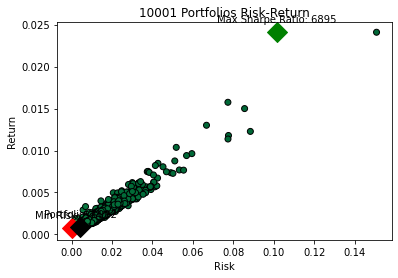

In [92]:
import matplotlib.pyplot as plt
        # find min Volatility & max sharpe values in the dataframe (df)
    
def plot_single_point(x,y,title,colour):
        plt.scatter(x=x, y=y, c=colour, marker='D', s=200)
        plt.annotate(title, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center        
        
max_sharpe_ratio = maxsr
min_risk = minrisk
plt.scatter(vola, epr,c=sr,cmap='RdYlGn', edgecolors='black')
x = max_sharpe_ratio
y = epr[maxsrportfolio]
name = str(maxsrportfolio+1)   
plt.title(str(len(portafolio))+" Portfolios Risk-Return")
plt.xlabel("Risk")
plt.ylabel("Return")
plot_single_point(x,y,'Max Sharpe Ratio: '+name, 'green')
x = min_risk
y = epr[minriskportfolio]
name = str(minriskportfolio+1)
plot_single_point(x,y,'Min Risk: '+name, 'red')
x = vola[edportfolio-1]
y = epr[edportfolio-1]
name = str(edportfolio+1)
plot_single_point(x,y,'Portfolio: '+name, 'black')
